In [53]:
import datetime
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import os
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ipywidgets import widgets
from IPython.display import display, Image, clear_output
from ipywidgets import interact, interactive, fixed, interact_manual

#Folder of a given season 
file_path='/Users/ceciliaacosta/Desktop/nhl_data/20172018'
#Path to the rink image
rink_image_path='/Users/ceciliaacosta/Desktop/nhl_data/nhl_rink.png'
year=file_path[-8:-4]

# Get the total number and the ID's to use in the slider (LAST FOUR DIGITS) of regular season and playoff games
regular_games=[filename for filename in (os.listdir(file_path)) if filename[-11:-9]=='02']
total_regular_season_games = len(regular_games)
idx_regular_games=sorted([int(id.rstrip('.json')[-4:]) for id in regular_games])

playoff_games = [filename for filename in (os.listdir(file_path)) if  filename[-11:-9]=='03']
total_playoff_games=len(playoff_games)
idx_playoff_games=sorted([int(id.rstrip('.json')[-3:]) for id in playoff_games])




[111, 112, 113, 114, 115, 121, 122, 123, 124, 125, 126, 127, 131, 132, 133, 134, 135, 136, 141, 142, 143, 144, 145, 146, 151, 152, 153, 154, 155, 156, 161, 162, 163, 164, 165, 171, 172, 173, 174, 181, 182, 183, 184, 211, 212, 213, 214, 215, 221, 222, 223, 224, 225, 226, 231, 232, 233, 234, 235, 236, 237, 241, 242, 243, 244, 245, 246, 311, 312, 313, 314, 315, 316, 317, 321, 322, 323, 324, 325, 411, 412, 413, 414, 415]


In [48]:
def get_coordinates(nested_data, event_id):
    
    x=nested_data[event_id].get('coordinates').get('x',None)
    y=nested_data[event_id].get('coordinates').get('y',None)

    return x, y 

#load data
def load_data(game_ID, season):
    global file_path
    if season=='regular_season':
        season_code='02'
    else:
        season_code='03'

    if len(str(game_ID))==1:
        files_game = f"{file_path}/nhl_game_{year}{season_code}000{game_ID}.json"
    if len(str(game_ID))==2:
        files_game = f"{file_path}/nhl_game_{year}{season_code}00{game_ID}.json"
    if len(str(game_ID))==3:
        files_game = f"{file_path}/nhl_game_{year}{season_code}0{game_ID}.json"
    if len(str(game_ID))==4:
        files_game = f"{file_path}/nhl_game_{year}{season_code}{game_ID}.json"

    if os.path.exists(files_game):

        with open(files_game, 'r') as file:
            return json.load(file)
    else:
        return None

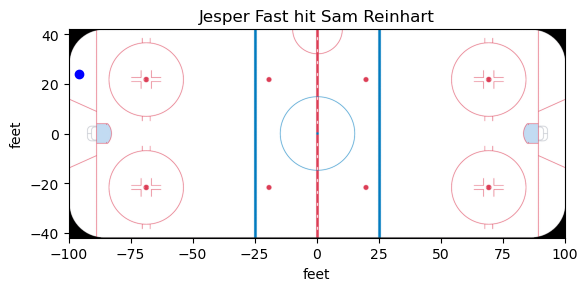

{'about': {'dateTime': '2018-01-19T02:35:17Z',
           'eventId': 494,
           'eventIdx': 265,
           'goals': {'away': 2, 'home': 2},
           'ordinalNum': '3rd',
           'period': 3,
           'periodTime': '01:55',
           'periodTimeRemaining': '18:05',
           'periodType': 'REGULAR'},
 'coordinates': {'x': -96.0, 'y': 24.0},
 'players': [{'player': {'fullName': 'Jesper Fast',
                         'id': 8475855,
                         'link': '/api/v1/people/8475855'},
              'playerType': 'Hitter'},
             {'player': {'fullName': 'Sam Reinhart',
                         'id': 8477933,
                         'link': '/api/v1/people/8477933'},
              'playerType': 'Hittee'}],
 'result': {'description': 'Jesper Fast hit Sam Reinhart',
            'event': 'Hit',
            'eventCode': 'NYR494',
            'eventTypeId': 'HIT'},
 'team': {'id': 3,
          'link': '/api/v1/teams/3',
          'name': 'New York Rangers',
        

In [55]:
output = widgets.Output()
def display_game_events(game_data):

    allplays_path=['liveData', 'plays', 'allPlays']
    nested_data = game_data

    #Update the event ID slider (aka the index in the list of events)
    for key in allplays_path:
        nested_data = nested_data.get(key, {})
    event_id_slider.max=len(nested_data)-1
    event_id = event_id_slider.value
    # with output:
    #     clear_output(wait=True)
    clear_output(wait=True)

    if game_data:
        x_coord, y_coord=get_coordinates(nested_data, event_id)
        if x_coord== None and y_coord==None:
            pprint(nested_data[event_id])
            event_type=nested_data[event_id].get('result',{}).get('description',"")
        else:
            event_type=nested_data[event_id].get('result',{}).get('description',"")
# Display event information on the ice rink image
            # Load the rink image to get its dimensions
            rink_image = mpimg.imread(rink_image_path)
            fig, ax = plt.subplots()
            ax.patch.set_facecolor('black')
            im = ax.imshow(rink_image, origin='lower', extent=[-100, 100, -42, 42])
            ax.plot(x_coord,y_coord, 'bo')
            ax.set_title(f'{event_type}')
            ax.set_xlabel('feet')
            ax.set_ylabel('feet')
            plt.show()
            pprint(nested_data[event_id])

    # Function to update the display based on the selected season and game ID
def update_display(change):
    season = 'regular_season' if season_dropdown.value == 'Regular Season' else 'playoffs'
    game_id = game_id_slider.value
    game_data = load_data(game_id, season)

    if game_data:
        display_game_events(game_data)

    else:

        print(f"Game data not found for Game ID {game_id} in the {season}.")


# Attach the update_display function to the widgets' observe methods
# Create a dropdown widget to select the season
season_dropdown = widgets.Dropdown(
    options=['Regular Season', 'Playoffs'],
    description='Season:',
)

#Create an IntSlider for Game ID with a maximum value that depends on the selected season
game_id_slider = widgets.IntSlider(
    min=1,
    max=total_regular_season_games,
    description='Game ID:',
    continuous_update=False,
    options=idx_regular_games
)

event_id_slider = widgets.IntSlider(
    min=0,
    max=0,  # Initialize with 0 events
    description='Event ID:',
    continuous_update=False,
)

#Function to update the slider based on the selected type of Season 
def update_slider(change):
    if season_dropdown.value == 'Regular Season':
        game_id_slider.max = max(idx_regular_games)
        game_id_slider.min = min(idx_regular_games)
        game_id_slider.options=idx_regular_games

    else:
        game_id_slider.max = max(idx_playoff_games)
        game_id_slider.min= min(idx_playoff_games)
        game_id_slider.options=idx_playoff_games

# Attach the update_display function to the widgets' observe methods
# Create a dropdown widget to select the season
season_dropdown = widgets.Dropdown(
    options=['Regular Season', 'Playoffs'],
    description='Season:',
)

season_dropdown.observe(update_slider, 'value')
game_id_slider.observe(update_display, 'value')
event_id_slider.observe(update_display, 'value')

display(output)
update_display(None) 


In [56]:
season_dropdown.observe(update_slider, 'value')
game_id_slider.observe(update_display, 'value')
event_id_slider.observe(update_display, 'value')
display(season_dropdown, game_id_slider, event_id_slider)

Dropdown(description='Season:', options=('Regular Season', 'Playoffs'), value='Regular Season')

IntSlider(value=1, continuous_update=False, description='Game ID:', max=1271, min=1)

IntSlider(value=0, continuous_update=False, description='Event ID:', max=311)